# 線形回帰

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.graphics.regressionplots import *
from sklearn import datasets, linear_model

In [8]:
from sklearn.datasets import fetch_california_housing
california_data = fetch_california_housing()
print(california_data.target)
California = pd.DataFrame(california_data.data, columns = california_data.feature_names)
print(list(California))
print(California.shape)
California


[4.526 3.585 3.521 ... 0.923 0.847 0.894]
['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
(20640, 8)


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [14]:
California['MedHouseValue'] = california_data.target


# 線形回帰

In [25]:
lm = smf.ols('MedHouseValue ~ MedInc', data=California).fit()
lm.summary()
lm.params

Intercept    0.450856
MedInc       0.417938
dtype: float64

In [26]:
lm.conf_int()

,0,1
Intercept,0.424926,0.476785
MedInc,0.411925,0.423952


In [27]:
lm.predict(pd.DataFrame({'MedInc':[5, 10 , 15]}))

0    2.540548
1    4.630241
2    6.719933
dtype: float64

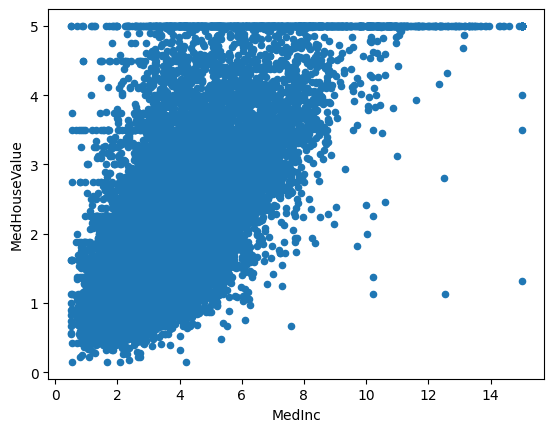

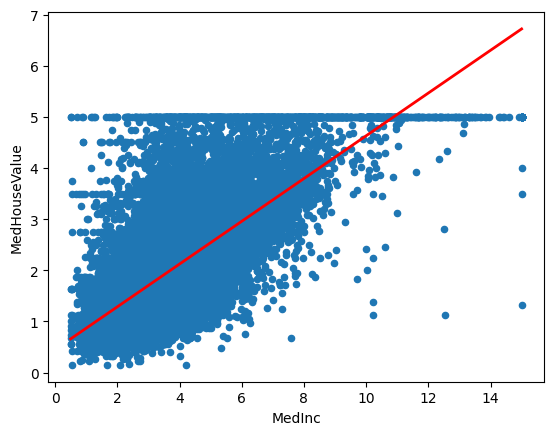

In [29]:
California.plot(kind='scatter', x ='MedInc', y= 'MedHouseValue')
plt.show()
range = pd.DataFrame({'MedInc': [California.MedInc.min(), California.MedInc.max()]})
preds = lm.predict(range)
California.plot(kind='scatter', x='MedInc',y = 'MedHouseValue')
plt.plot(range,preds,c='red', linewidth=2)
plt.show()

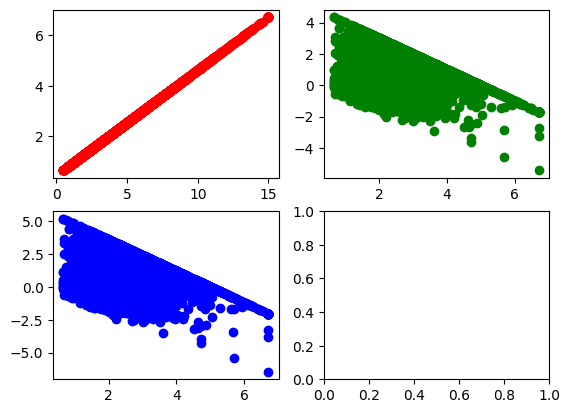

In [30]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2)
ax1.plot(California.MedInc, lm.predict(),'ro')
ax2.plot(lm.predict(),lm.resid,'go')
ax3.plot(lm.predict(), lm.resid_pearson,'bo')
plt.show()

In [31]:
x = pd.DataFrame(California.MedInc)
y = California.MedHouseValue
print(x.shape)
model = linear_model.LinearRegression()
model.fit(x, y)
print(model.intercept_)
print(model.coef_)

(20640, 1)
0.45085576703267893
[0.41793849]


 New Section

# Udemyの線形回帰(statsmodels)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


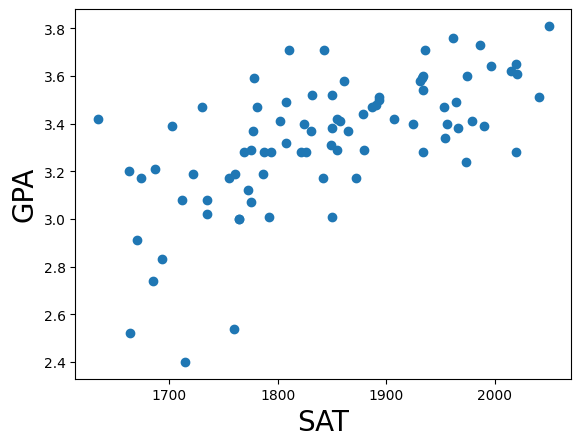

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.graphics.regressionplots import *
from sklearn import datasets, linear_model


from google.colab import drive
drive.mount('/content/drive')
path = '/content/drive/MyDrive/Deep Learning/統計的機械学習　演習/data/'


df = pd.read_csv(path + '1.01. Simple linear regression.csv')

df.describe()

x1 = df['SAT']
y = df['GPA']
plt.scatter(x1, y)
plt.xlabel('SAT', fontsize = 20)
plt.ylabel('GPA', fontsize = 20)
plt.show()


In [15]:
x = sm.add_constant(x1)
results = sm.OLS(y, x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.406
Model:                            OLS   Adj. R-squared:                  0.399
Method:                 Least Squares   F-statistic:                     56.05
Date:                Sat, 13 Jul 2024   Prob (F-statistic):           7.20e-11
Time:                        07:49:18   Log-Likelihood:                 12.672
No. Observations:                  84   AIC:                            -21.34
Df Residuals:                      82   BIC:                            -16.48
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2750      0.409      0.673      0.503      -0.538       1.088
SAT            0.0017      0.000      7.487      0.000       0.001       0.002
==============================================================================
Omnibus:                       12.839   Durbin-Watson:                   0.950
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               16.155
Skew:                          -0.722   Prob(JB):                     0.000310
Kurtosis:                       4.590   Cond. No.                     3.29e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.29e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

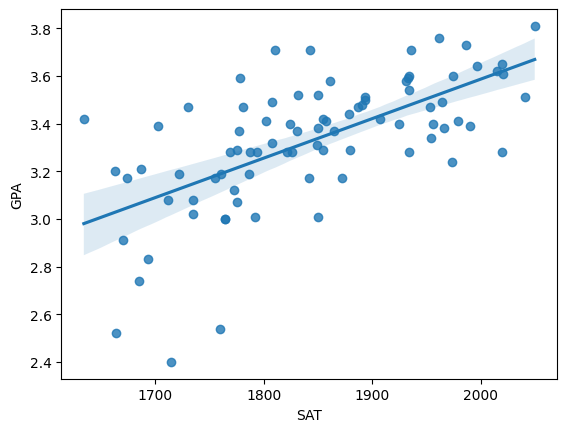

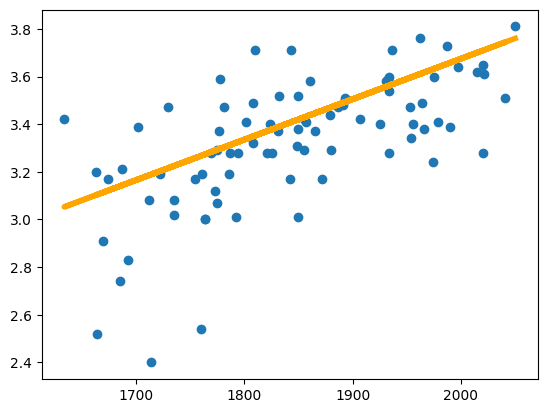

In [17]:
import seaborn as sns
sns.regplot(x='SAT', y='GPA', data=df)
plt.show()
plt.scatter(x1,y)
yhat = 0.0017*x1 + 0.275
fig = plt.plot(x1,yhat, lw=4, c='orange', label ='regression line')

# 重回帰分析 statsmodels

In [22]:
data = pd.read_csv(path + '1.02. Multiple linear regression.csv')
y = data['GPA']
x1 = data[['SAT', 'Rand 1,2,3']]
x = sm.add_constant(x1)
results = sm.OLS(y, x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.407
Model:                            OLS   Adj. R-squared:                  0.392
Method:                 Least Squares   F-statistic:                     27.76
Date:                Sat, 13 Jul 2024   Prob (F-statistic):           6.58e-10
Time:                        08:12:25   Log-Likelihood:                 12.720
No. Observations:                  84   AIC:                            -19.44
Df Residuals:                      81   BIC:                            -12.15
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2960      0.417      0.710      0.480      -0.533       1.125
SAT            0.0017      0.000      7.432      0.000       0.001       0.002
Rand 1,2,3    -0.0083      0.027     -0.304      0.762      -0.062       0.046
==============================================================================
Omnibus:                       12.992   Durbin-Watson:                   0.948
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               16.364
Skew:                          -0.731   Prob(JB):                     0.000280
Kurtosis:                       4.594   Cond. No.                     3.33e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.33e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [30]:
raw_data = pd.read_csv(path + '1.03. Dummies.csv')
data = raw_data.copy()
data['Attendance'] = data['Attendance'].map({'Yes':1, 'No': 0})
y = data['GPA']
x1 = data[['SAT', 'Attendance']]
x = sm.add_constant(x1)
results = sm.OLS(y, x).fit()
results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.565
Model:                            OLS   Adj. R-squared:                  0.555
Method:                 Least Squares   F-statistic:                     52.70
Date:                Sat, 13 Jul 2024   Prob (F-statistic):           2.19e-15
Time:                        08:44:13   Log-Likelihood:                 25.798
No. Observations:                  84   AIC:                            -45.60
Df Residuals:                      81   BIC:                            -38.30
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6439      0.358      1.797      0.076      -0.069       1.357
SAT            0.0014      0.000      7.141      0.000       0.001       0.002
Attendance     0.2226      0.041      5.451      0.000       0.141       0.304
==============================================================================
Omnibus:                       19.560   Durbin-Watson:                   1.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.189
Skew:                          -1.028   Prob(JB):                     1.25e-06
Kurtosis:                       4.881   Cond. No.                     3.35e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.35e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [31]:
new_data =pd.DataFrame({'const':1, 'SAT':[1700, 1670], 'Attendance':[0, 1]})
new_data
predictions =results.predict(new_data)
predictions

0    3.023513
1    3.204163
dtype: float64

In [33]:
predictionsdf = pd.DataFrame({'Predictions':predictions})
joined = new_data.join(predictionsdf)
joined.rename(index={0:'Bob', 1:'Alice'})

,const,SAT,Attendance,Predictions
Bob,1,1700,0,3.023513
Alice,1,1670,1,3.204163


In [ ]:
''